In [1]:
import h5py
import numpy as np    
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image


######## Very basic access to the dataset - let's see what we are working with! #######
raw_dataset = h5py.File('climatevisions_2019_popular.h5','r+') 
image_directory =  "C:\\Users\\User\\OneDrive\\Desktop\\ProjectCode\\Team_Project_ComputerVision-1\\Dataset_small"

contents = os.listdir(image_directory)
print(contents)

# Access the 'upper' data - we only have tweet data 
for item in raw_dataset.keys():
   print("Items: " + item)    
    
# Access the actual subgroups with data for us 
for item in raw_dataset.require_group('tweet_data').keys():
    print(item)


['id_1079890220290633729_2019-01-01.jpg', 'id_1079930976350932993_2019-01-01.jpg', 'id_1080106880805097474_2019-01-01.jpg', 'id_1080169037957599234_2019-01-01.jpg', 'id_1080199439992655872_2019-01-01.jpg', 'id_1080228300264538117_2019-01-01.jpg', 'id_1080368104008491018_2019-01-02.jpg', 'id_1080388441773346816_2019-01-02.jpg', 'id_1080523978190376960_2019-01-02.jpg', 'id_1080547022317412352_2019-01-02.jpg', 'id_1080582296053444608_2019-01-02.jpg', 'id_1080639926515974145_2019-01-03.jpg', 'id_1080842163104202752_2019-01-03.jpg', 'id_1080933766334476288_2019-01-03.jpg', 'id_1080972709725683712_2019-01-03.jpg', 'id_1081023930721284101_2019-01-04.jpg', 'id_1081028208403787776_2019-01-04.jpg', 'id_1081069234522935297_2019-01-04.jpg', 'id_1081204886992228353_2019-01-04.jpg', 'id_1081211263110258693_2019-01-04.jpg', 'id_1081262245546545152_2019-01-04.jpg', 'id_1081287520762118144_2019-01-04.jpg', 'id_1081302806617829376_2019-01-04.jpg', 'id_1081329963096293378_2019-01-04.jpg', 'id_10814067084

In [2]:
# Access the dataset within the group
dataset = raw_dataset['tweet_data']  ## excludes unnecessary information - only tweet_data
 
# Create a dictionary to store column data
data_dict = {}
    
# Iterate through the keys (assuming each key is a column name)
for key in dataset.keys():
     # Access the data for each column
     column_data = dataset[key][:]
        
     # Store the data in the dictionary with the column name as the key
     data_dict[key] = column_data
# convert the dictionary to a pandas dataframe
df = pd.DataFrame(data_dict)
df.head()




,created_at,img_name,language,like_count,quote_count,referenced_tweets,retweet_count,text,tweet_id
0,b'2019-07-22T12:38:24.000Z',b'id_1153283149360762880_2019-07-22.jpg\n',b'en',b'82582',b'3918',b'<NA>',b'50280',b'the UN released a 740 page report compiled o...,b'1153283149360762880'
1,b'2019-08-20T09:28:39.000Z',b'id_1163744643600637952_2019-08-20.jpg\n',b'en',b'69820',b'2456',b'<NA>',b'51781',"b'The Amazon Rainforest, one of the wettest pl...",b'1163744643600637952'
2,b'2019-04-28T18:51:22.000Z',b'id_1122574040936452097_2019-04-28.jpg\n',b'en',b'69235',b'87',b'<NA>',b'11051',b'just learned about climate change https://t....,b'1122574040936452097'
3,b'2019-10-28T13:10:13.000Z',b'id_1188805167958974465_2019-10-28.jpg\n',b'en',b'65465',b'70',b'<NA>',b'6124',b'Climate change caused this. https://t.co/JG2...,b'1188805167958974465'
4,b'2019-03-19T16:30:00.000Z',b'id_1108042949449969666_2019-03-19.jpg\n',b'en',b'62852',b'976',b'<NA>',b'9145',b'#GreenNewDeal haters\xe2\x80\x99 plan to add...,b'1108042949449969666'


# Preprocessing

In [3]:
# strip of "b'" of all strings

cols_to_strip = ['created_at', 'img_name', 'language', 'referenced_tweets', 'text', 'tweet_id']   

df[cols_to_strip] = df[cols_to_strip].astype('string')
df[cols_to_strip] = df[cols_to_strip].replace(to_replace=r'^b\':?(.*)\'$', value=r'\1', regex=True)


print(df.shape)
df.dtypes

## only keep images here
# drop all columns exepct img_ columns
selected_columns = ['img_name']
df_selected = df.loc[:, selected_columns]
df_selected.head()

(5000, 9)


,img_name
0,id_1153283149360762880_2019-07-22.jpg
1,id_1163744643600637952_2019-08-20.jpg
2,id_1122574040936452097_2019-04-28.jpg
3,id_1188805167958974465_2019-10-28.jpg
4,id_1108042949449969666_2019-03-19.jpg


In [4]:
df.head()

,created_at,img_name,language,like_count,quote_count,referenced_tweets,retweet_count,text,tweet_id
0,2019-07-22T12:38:24.000Z,id_1153283149360762880_2019-07-22.jpg,en,b'82582',b'3918',<NA>,b'50280',the UN released a 740 page report compiled ove...,1153283149360762880
1,2019-08-20T09:28:39.000Z,id_1163744643600637952_2019-08-20.jpg,en,b'69820',b'2456',<NA>,b'51781',"The Amazon Rainforest, one of the wettest plac...",1163744643600637952
2,2019-04-28T18:51:22.000Z,id_1122574040936452097_2019-04-28.jpg,en,b'69235',b'87',<NA>,b'11051',just learned about climate change https://t.co...,1122574040936452097
3,2019-10-28T13:10:13.000Z,id_1188805167958974465_2019-10-28.jpg,en,b'65465',b'70',<NA>,b'6124',Climate change caused this. https://t.co/JG2Ly...,1188805167958974465
4,2019-03-19T16:30:00.000Z,id_1108042949449969666_2019-03-19.jpg,en,b'62852',b'976',<NA>,b'9145',#GreenNewDeal haters’ plan to address Climate ...,1108042949449969666


In [ ]:
import h5py
import numpy as np    
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image

raw_dataset = h5py.File('climatevisions_2019_popular.h5','r+') 
dataset = raw_dataset['tweet_data']
image_directory = 'C:\\Users\\Admin\\Documents\\Dataset_small\\'
cols_to_strip = ['created_at', 'img_name', 'language', 'referenced_tweets', 'text', 'tweet_id']   

data_dict = {}
# Iterate through the keys (assuming each key is a column name)
for key in dataset.keys():
     # Access the data for each column
     column_data = dataset[key][:]
        
     # Store the data in the dictionary with the column name as the key
     data_dict[key] = column_data
     
df = pd.DataFrame(data_dict)
df[cols_to_strip] = df[cols_to_strip].astype('string')
df[cols_to_strip] = df[cols_to_strip].replace(to_replace=r'^b\':?(.*)\'$', value=r'\1', regex=True)


print(df.shape)
df.dtypes

## only keep images here
# drop all columns exepct img_ columns
selected_columns = ['img_name']
df_selected = df.loc[:, selected_columns]
df_selected.head()

(5000, 9)


,img_name
0,id_1153283149360762880_2019-07-22.jpg
1,id_1163744643600637952_2019-08-20.jpg
2,id_1122574040936452097_2019-04-28.jpg
3,id_1188805167958974465_2019-10-28.jpg
4,id_1108042949449969666_2019-03-19.jpg


In [5]:
df.describe()

,created_at,img_name,language,like_count,quote_count,referenced_tweets,retweet_count,text,tweet_id
count,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,4999,5000,28,1237,232,1,735,5000,5000
top,2019-02-07T19:34:34.000Z,id_1153283149360762880_2019-07-22.jpg\n,en,b'161',b'2',<NA>,b'50',the UN released a 740 page report compiled ove...,1153283149360762880
freq,2,1,4823,39,363,5000,51,1,1


## Missing Values

#### Observations:
- entities_cashtags, in_reply_to_user_id, referenced_tweets only missing values
- 100-400 missing values: geo_coord_data, geo_coord_type, withheld_copyright, withheld_countrycode
- around 300.000 missing: entities_annotations, entities_mentions

In [4]:
# replace string NA to "real" missing value for further analysis
df = df.replace(r'^NA$', np.nan, regex=True)
df.isna().sum()

created_at           0
img_name             0
language             0
like_count           0
quote_count          0
referenced_tweets    0
retweet_count        0
text                 0
tweet_id             0
dtype: int64

## Testing of Models 

Object detection model: DETR-ResNet-50

In [ ]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

image_path = "C:\\Users\\User\\OneDrive\\Desktop\\ProjectCode\\Team_Project_ComputerVision-1\\Dataset_small\\id_1082623163039653889_2019-01-08.jpg"
image = Image.open(image_path)

# you can specify the revision tag if you don't want the timm dependency
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )


Detected car with confidence 0.996 at location [818.3, 380.98, 952.25, 472.64]
Detected car with confidence 0.944 at location [749.63, 322.39, 806.12, 377.34]
Detected car with confidence 0.994 at location [732.65, 436.42, 864.76, 529.21]
Detected car with confidence 0.997 at location [909.46, 465.23, 999.8, 528.93]
Detected car with confidence 0.983 at location [607.13, 278.32, 664.46, 315.77]
Detected traffic light with confidence 0.973 at location [524.26, 142.08, 539.97, 173.87]
Detected car with confidence 0.918 at location [771.3, 309.26, 843.28, 354.31]
Detected car with confidence 0.993 at location [783.8, 347.87, 867.77, 415.28]
Detected car with confidence 0.925 at location [666.3, 223.38, 704.56, 250.42]
Detected person with confidence 0.9 at location [347.34, 432.76, 385.72, 524.72]
Detected traffic light with confidence 0.975 at location [436.25, 134.66, 450.51, 160.96]
Detected bus with confidence 0.958 at location [611.62, 139.43, 787.89, 218.92]
Detected truck with conf

Background Removal: briaai/RMBG-1.4

In [5]:
from transformers import pipeline
image_path = "C:\\Users\\User\\OneDrive\\Desktop\\ProjectCode\\Team_Project_ComputerVision-1\\Dataset_small\\id_1083148125743783936_2019-01-09.jpg"
#could make it work for more images but takes a lot of time and we already detected it doesnt work that well
pipe = pipeline("image-segmentation", model="briaai/RMBG-1.4", trust_remote_code=True)
pillow_mask = pipe(image_path, return_mask = True) # outputs a pillow mask
pillow_image = pipe(image_path) # applies mask on input and returns a pillow image
#show the image
pillow_image.show()


Object detection model: YOLOv8n.pt

In [ ]:
from ultralytics import YOLO

# Load the YOLO model
model = YOLO("yolov8n.pt")  

# Load the image
image_path = "C:\\Users\\User\\OneDrive\\Desktop\\ProjectCode\\Team_Project_ComputerVision-1\\Dataset_small\\id_1083767274618716160_2019-01-11.jpg"

# Perform object detection on the image
results = model(image_path)

# Iterate over each detection result and display it
for result in results:
    # Display the detected objects
    result.show()

    # Alternatively, you can save the annotated image
    result.save()

    # Accessing the detections
    detections = result.pred[0] if hasattr(result, 'pred') else None  # Get the detections if available

    if detections is not None:
        # Extracting bounding boxes, classes, and confidence scores
        boxes = detections[:, :4]  # Extract bounding boxes
        confidences = detections[:, 4]  # Extract confidence scores
        class_ids = detections[:, 5]  # Extract class IDs

        # Print the detected objects
        for box, confidence, class_id in zip(boxes, confidences, class_ids):
            print(f"Detected class {class_id.item()} with confidence {confidence.item()} at location {box.tolist()}")
#works well with animals,
#doesnt work well with abstract images: it predicted a floating globe as a doghnut



image 1/1 C:\Users\User\OneDrive\Desktop\ProjectCode\Team_Project_ComputerVision-1\Dataset_small\id_1083767274618716160_2019-01-11.jpg: 512x640 1 person, 1 bench, 148.3ms
Speed: 9.0ms preprocess, 148.3ms inference, 2601.1ms postprocess per image at shape (1, 3, 512, 640)


Image classification: google/vit-base-patch16-224

In [7]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests

image_path = "C:\\Users\\User\\OneDrive\\Desktop\\ProjectCode\\Team_Project_ComputerVision-1\\Dataset_small\\id_1205801708644978689_2019-12-14.jpg"
image = Image.open(image_path)

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])
#works well for images with a single object, e.g. a cat, a dog,
#animals: good, people: not good, objects: good


Predicted class: fountain


Image Classification: Falconsai/nsfw_image_detection

In [ ]:
import torch
from PIL import Image
from transformers import AutoModelForImageClassification, ViTImageProcessor

image_path = "C:\\Users\\User\\OneDrive\\Desktop\\ProjectCode\\Team_Project_ComputerVision-1\\Dataset_small\\id_1086663702567374848_2019-01-19.jpg"
image = Image.open(image_path)

model = AutoModelForImageClassification.from_pretrained("Falconsai/nsfw_image_detection")
processor = ViTImageProcessor.from_pretrained('Falconsai/nsfw_image_detection')
with torch.no_grad():
    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits

predicted_label = logits.argmax(-1).item()
model.config.id2label[predicted_label]


'normal'

Nsfw/sfw for 1000 images of small dataset

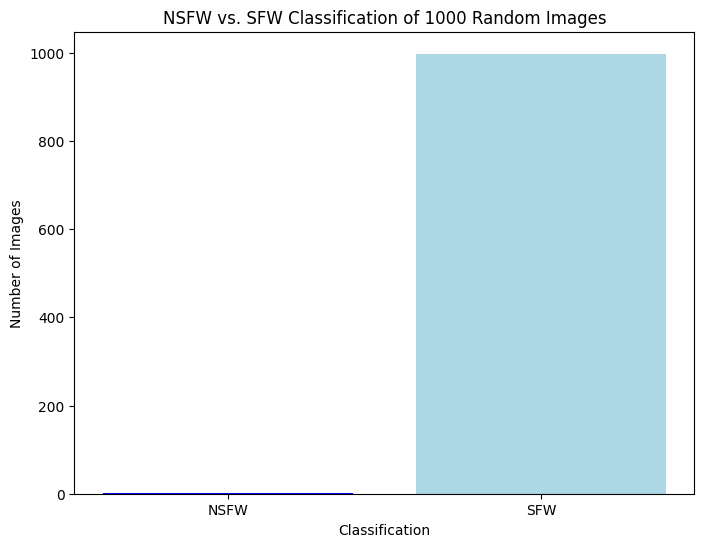

In [18]:
import os
import random
import torch
from PIL import Image
from transformers import AutoModelForImageClassification, ViTImageProcessor
import matplotlib.pyplot as plt

# Define the path to the dataset folder
dataset_folder = "C:\\Users\\User\\OneDrive\\Desktop\\ProjectCode\\Team_Project_ComputerVision-1\\Dataset_small"

# Get all image file paths from the folder
image_files = [os.path.join(dataset_folder, file) for file in os.listdir(dataset_folder) if file.lower().endswith(('png', 'jpg', 'jpeg'))]

# Randomly select 1000 image files
selected_images = random.sample(image_files, 1000)

# Load the NSFW detection model and processor
model = AutoModelForImageClassification.from_pretrained("Falconsai/nsfw_image_detection")
processor = ViTImageProcessor.from_pretrained("Falconsai/nsfw_image_detection")

# Function to classify an image
def classify_image(image_path):
    image = Image.open(image_path)
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
    predicted_label = logits.argmax(-1).item()
    return model.config.id2label[predicted_label]

# Classify all selected images and count the results
results = {"NSFW": 0, "SFW": 0}

for image_path in selected_images:
    label = classify_image(image_path)
    if label == "nsfw":
        results["NSFW"] += 1
    else:
        results["SFW"] += 1

# Plot the results in a histogram
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'lightblue'])
plt.xlabel('Classification')
plt.ylabel('Number of Images')
plt.title('NSFW vs. SFW Classification of 1000 Random Images')
plt.show()


Image Classification: microsoft/resnet-18

In [8]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
import torch
image_path = "C:\\Users\\User\\OneDrive\\Desktop\\ProjectCode\\Team_Project_ComputerVision-1\\Dataset_small\\id_1205801708644978689_2019-12-14.jpg"
image = Image.open(image_path)
image_processor = AutoImageProcessor.from_pretrained("microsoft/resnet-18")
model = AutoModelForImageClassification.from_pretrained("microsoft/resnet-18")

inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])
#works well with animals, objects, not so good with people
#detects people as clothes


American egret, great white heron, Egretta albus


Image Classification : microsoft/resnet-50

In [12]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
import torch
# Path to the image file
image_path = "C:\\Users\\User\\OneDrive\\Desktop\\ProjectCode\\Team_Project_ComputerVision-1\\Dataset_small\\id_1205801708644978689_2019-12-14.jpg"

# Load the image
image = Image.open(image_path)

# Load the processor and model
processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = AutoModelForImageClassification.from_pretrained("microsoft/resnet-50")

# Preprocess the image and get the inputs
inputs = processor(images=image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    logits = model(**inputs).logits

# Get the predicted label
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])


albatross, mollymawk


Comparison of Image Classification Models, based on label overlapp and agreement matrix

In [60]:
import os
import random
from transformers import AutoImageProcessor, AutoModelForImageClassification, ViTImageProcessor, ViTForImageClassification
from PIL import Image
import torch
import numpy as np

# Define the path to the dataset folder
dataset_folder = "C:\\Users\\User\\OneDrive\\Desktop\\ProjectCode\\Team_Project_ComputerVision-1\\Dataset_small"

# Get all image file paths from the folder
image_files = [os.path.join(dataset_folder, file) for file in os.listdir(dataset_folder) if file.lower().endswith(('png', 'jpg', 'jpeg'))]

# Randomly select 10 image files.. can do the whole dataset
selected_images = random.sample(image_files, 10)

# Define models and processors
models_processors = [
    {
        'name': 'ResNet-50',
        'processor': AutoImageProcessor.from_pretrained("microsoft/resnet-50"),
        'model': AutoModelForImageClassification.from_pretrained("microsoft/resnet-50")
    },
    {
        'name': 'ResNet-18',
        'processor': AutoImageProcessor.from_pretrained("microsoft/resnet-18"),
        'model': AutoModelForImageClassification.from_pretrained("microsoft/resnet-18")
    },
    {
        'name': 'ViT',
        'processor': ViTImageProcessor.from_pretrained('google/vit-base-patch16-224'),
        'model': ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
    }
]

# Function to get predicted label
def get_predicted_label(processor, model, image):
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_label = logits.argmax(-1).item()
    return model.config.id2label[predicted_label]

# Collect predictions for a single image
def collect_predictions(image_path):
    image = Image.open(image_path)
    predictions = {}
    for mp in models_processors:
        label = get_predicted_label(mp['processor'], mp['model'], image)
        predictions[mp['name']] = label
    return predictions

# Calculate overlap metrics
def calculate_similarity(predictions):
    labels = list(predictions.values())
    num_models = len(labels)
    agreement_matrix = np.zeros((num_models, num_models))
    
    for i in range(num_models):
        for j in range(i, num_models):
            agreement_matrix[i, j] = 1 if labels[i] == labels[j] else 0
            agreement_matrix[j, i] = agreement_matrix[i, j]  # Symmetric
    
    return agreement_matrix

# Evaluate and compare for each selected image
for image_path in selected_images:
    print(f"\nEvaluating image: {image_path}")
    predictions = collect_predictions(image_path)
    agreement_matrix = calculate_similarity(predictions)
    
    print("Predictions for the image:")
    for model, label in predictions.items():
        print(f"Model: {model}, Predicted label: {label}")

    print("\nAgreement Matrix (1 indicates agreement, 0 indicates no agreement):")
    print(agreement_matrix)



Evaluating image: C:\Users\User\OneDrive\Desktop\ProjectCode\Team_Project_ComputerVision-1\Dataset_small\id_1194609265182486528_2019-11-13.jpg
Predictions for the image:
Model: ResNet-50, Predicted label: planetarium
Model: ResNet-18, Predicted label: library
Model: ViT, Predicted label: window shade

Agreement Matrix (1 indicates agreement, 0 indicates no agreement):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Evaluating image: C:\Users\User\OneDrive\Desktop\ProjectCode\Team_Project_ComputerVision-1\Dataset_small\id_1130937558391840768_2019-05-21.jpg
Predictions for the image:
Model: ResNet-50, Predicted label: shower cap
Model: ResNet-18, Predicted label: shower cap
Model: ViT, Predicted label: vestment

Agreement Matrix (1 indicates agreement, 0 indicates no agreement):
[[1. 1. 0.]
 [1. 1. 0.]
 [0. 0. 1.]]

Evaluating image: C:\Users\User\OneDrive\Desktop\ProjectCode\Team_Project_ComputerVision-1\Dataset_small\id_1130428712510459904_2019-05-20.jpg
Predictions for the image:
Model: ResNet

Comparison of Image Classification Models based on Jaccard  similarity 

In [6]:
import os
import random
from transformers import AutoImageProcessor, AutoModelForImageClassification, ViTImageProcessor, ViTForImageClassification
from PIL import Image
import torch

# Define the path to the dataset folder
dataset_folder = "C:\\Users\\User\\OneDrive\\Desktop\\ProjectCode\\Team_Project_ComputerVision-1\\Dataset_small"

# Get all image file paths from the folder
image_files = [os.path.join(dataset_folder, file) for file in os.listdir(dataset_folder) if file.lower().endswith(('png', 'jpg', 'jpeg'))]

# Randomly select 5 image files
selected_images = random.sample(image_files, 5)

# Define models and processors
models_processors = [
    {
        'name': 'ResNet-50',
        'processor': AutoImageProcessor.from_pretrained("microsoft/resnet-50"),
        'model': AutoModelForImageClassification.from_pretrained("microsoft/resnet-50")
    },
    {
        'name': 'ResNet-18',
        'processor': AutoImageProcessor.from_pretrained("microsoft/resnet-18"),
        'model': AutoModelForImageClassification.from_pretrained("microsoft/resnet-18")
    },
    {
        'name': 'ViT',
        'processor': ViTImageProcessor.from_pretrained('google/vit-base-patch16-224'),
        'model': ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
    }
]

# Function to get predicted label
def get_predicted_label(processor, model, image):
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_label = logits.argmax(-1).item()
    return model.config.id2label[predicted_label]

# Collect predictions for a single image
def collect_predictions(image_path):
    image = Image.open(image_path)
    predictions = {}
    for mp in models_processors:
        label = get_predicted_label(mp['processor'], mp['model'], image)
        predictions[mp['name']] = label
    return predictions

# Function to compute Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union != 0 else 0

# Calculate Jaccard similarity values for a single image
def calculate_and_print_jaccard_similarity(predictions):
    labels = list(predictions.values())
    sets = [set(label.lower().split(', ')) for label in labels]
    num_models = len(sets)
    
    for i in range(num_models):
        for j in range(i + 1, num_models):
            similarity = jaccard_similarity(sets[i], sets[j])
            print(f"Jaccard Similarity between {models_processors[i]['name']} and {models_processors[j]['name']}: {similarity:.4f}")

# Evaluate and compare for each selected image
for image_path in selected_images:
    print(f"\nEvaluating image: {image_path}")
    predictions = collect_predictions(image_path)
    calculate_and_print_jaccard_similarity(predictions)



Evaluating image: C:\Users\User\OneDrive\Desktop\ProjectCode\Team_Project_ComputerVision-1\Dataset_small\id_1142561382937878530_2019-06-22.jpg
Jaccard Similarity between ResNet-50 and ResNet-18: 0.0000
Jaccard Similarity between ResNet-50 and ViT: 0.0000
Jaccard Similarity between ResNet-18 and ViT: 1.0000

Evaluating image: C:\Users\User\OneDrive\Desktop\ProjectCode\Team_Project_ComputerVision-1\Dataset_small\id_1169033466064834562_2019-09-03.jpg
Jaccard Similarity between ResNet-50 and ResNet-18: 0.0000
Jaccard Similarity between ResNet-50 and ViT: 0.0000
Jaccard Similarity between ResNet-18 and ViT: 1.0000

Evaluating image: C:\Users\User\OneDrive\Desktop\ProjectCode\Team_Project_ComputerVision-1\Dataset_small\id_1149361819129176065_2019-07-11.jpg
Jaccard Similarity between ResNet-50 and ResNet-18: 0.0000
Jaccard Similarity between ResNet-50 and ViT: 0.0000
Jaccard Similarity between ResNet-18 and ViT: 0.0000

Evaluating image: C:\Users\User\OneDrive\Desktop\ProjectCode\Team_Projec

Jaccard Similarity: Model confidence taken into account

In [7]:
import os
import random
from transformers import AutoImageProcessor, AutoModelForImageClassification, ViTImageProcessor, ViTForImageClassification
from PIL import Image
import torch
import torch.nn.functional as F

# Define the path to the dataset folder
dataset_folder = "C:\\Users\\User\\OneDrive\\Desktop\\ProjectCode\\Team_Project_ComputerVision-1\\Dataset_small"

# Get all image file paths from the folder
image_files = [os.path.join(dataset_folder, file) for file in os.listdir(dataset_folder) if file.lower().endswith(('png', 'jpg', 'jpeg'))]

# Randomly select 5 image files
selected_images = random.sample(image_files, 5)

# Define models and processors
models_processors = [
    {
        'name': 'ResNet-50',
        'processor': AutoImageProcessor.from_pretrained("microsoft/resnet-50"),
        'model': AutoModelForImageClassification.from_pretrained("microsoft/resnet-50")
    },
    {
        'name': 'ResNet-18',
        'processor': AutoImageProcessor.from_pretrained("microsoft/resnet-18"),
        'model': AutoModelForImageClassification.from_pretrained("microsoft/resnet-18")
    },
    {
        'name': 'ViT',
        'processor': ViTImageProcessor.from_pretrained('google/vit-base-patch16-224'),
        'model': ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
    }
]

# Function to get predicted label and confidence score
def get_predicted_label_and_confidence(processor, model, image):
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
    probs = F.softmax(logits, dim=-1)
    predicted_label = logits.argmax(-1).item()
    confidence = probs[0, predicted_label].item()
    return model.config.id2label[predicted_label], confidence

# Collect predictions and confidence for a single image
def collect_predictions(image_path):
    image = Image.open(image_path)
    predictions = {}
    confidences = {}
    for mp in models_processors:
        label, confidence = get_predicted_label_and_confidence(mp['processor'], mp['model'], image)
        predictions[mp['name']] = label
        confidences[mp['name']] = confidence
    return predictions, confidences

# Function to compute confidence-weighted Jaccard similarity
def weighted_jaccard_similarity(set1, set2, conf1, conf2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    similarity = (intersection / union if union != 0 else 0)
    weighted_similarity = similarity * (conf1 * conf2)  # Weight by the product of confidences
    return weighted_similarity

# Calculate Jaccard similarity values for a single image, weighted by confidence
def calculate_and_print_weighted_jaccard_similarity(predictions, confidences):
    labels = list(predictions.values())
    confs = list(confidences.values())
    sets = [set(label.lower().split(', ')) for label in labels]
    num_models = len(sets)
    
    for i in range(num_models):
        for j in range(i + 1, num_models):
            similarity = weighted_jaccard_similarity(sets[i], sets[j], confs[i], confs[j])
            print(f"Confidence-Weighted Jaccard Similarity between {models_processors[i]['name']} and {models_processors[j]['name']}: {similarity:.4f}")

# Evaluate and compare for each selected image
for image_path in selected_images:
    print(f"\nEvaluating image: {image_path}")
    predictions, confidences = collect_predictions(image_path)
    calculate_and_print_weighted_jaccard_similarity(predictions, confidences)



Evaluating image: C:\Users\User\OneDrive\Desktop\ProjectCode\Team_Project_ComputerVision-1\Dataset_small\id_1123664441390899201_2019-05-01.jpg
Confidence-Weighted Jaccard Similarity between ResNet-50 and ResNet-18: 0.0000
Confidence-Weighted Jaccard Similarity between ResNet-50 and ViT: 0.0000
Confidence-Weighted Jaccard Similarity between ResNet-18 and ViT: 0.1597

Evaluating image: C:\Users\User\OneDrive\Desktop\ProjectCode\Team_Project_ComputerVision-1\Dataset_small\id_1167685735996153858_2019-08-31.jpg
Confidence-Weighted Jaccard Similarity between ResNet-50 and ResNet-18: 0.8781
Confidence-Weighted Jaccard Similarity between ResNet-50 and ViT: 0.9812
Confidence-Weighted Jaccard Similarity between ResNet-18 and ViT: 0.8625

Evaluating image: C:\Users\User\OneDrive\Desktop\ProjectCode\Team_Project_ComputerVision-1\Dataset_small\id_1169230892243574790_2019-09-04.jpg
Confidence-Weighted Jaccard Similarity between ResNet-50 and ResNet-18: 0.1262
Confidence-Weighted Jaccard Similarity 

Facial emotion recognition: Rajaram1996/FacialEmoRecog

In [ ]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image

# Load the image
image_path = "C:\\Users\\User\\OneDrive\\Desktop\\ProjectCode\\Team_Project_ComputerVision-1\\Dataset_small\\id_1173661994668515329_2019-09-16.jpg"
image = Image.open(image_path)

# Load the image processor and model
processor = AutoImageProcessor.from_pretrained("Rajaram1996/FacialEmoRecog")
model = AutoModelForImageClassification.from_pretrained("Rajaram1996/FacialEmoRecog")
print(model.config.id2label)
# Preprocess the image using the image processor
inputs = processor(images=image, return_tensors="pt")

# Get the predicted logits from the model
outputs = model(**inputs)
logits = outputs.logits

# Get the predicted label index
predicted_label = logits.argmax(dim=-1).item()

# Get the predicted label name using the model's config
predicted_label_name = model.config.id2label[predicted_label]

# Print the predicted label
print("Predicted label:", predicted_label_name)


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


{0: 'anger', 1: 'contempt', 2: 'disgust', 3: 'fear', 4: 'happy', 5: 'neutral', 6: 'sadness', 7: 'surprise'}
Predicted label: sadness


Visualizing Jaccard Similarity


Evaluating image: C:\Users\User\OneDrive\Desktop\ProjectCode\Team_Project_ComputerVision-1\Dataset_small\id_1206942609505226752_2019-12-17.jpg

Evaluating image: C:\Users\User\OneDrive\Desktop\ProjectCode\Team_Project_ComputerVision-1\Dataset_small\id_1115215794479218689_2019-04-08.jpg

Evaluating image: C:\Users\User\OneDrive\Desktop\ProjectCode\Team_Project_ComputerVision-1\Dataset_small\id_1103130478079553536_2019-03-06.jpg

Evaluating image: C:\Users\User\OneDrive\Desktop\ProjectCode\Team_Project_ComputerVision-1\Dataset_small\id_1120663255310061569_2019-04-23.jpg

Evaluating image: C:\Users\User\OneDrive\Desktop\ProjectCode\Team_Project_ComputerVision-1\Dataset_small\id_1126852822434308096_2019-05-10.jpg

Evaluating image: C:\Users\User\OneDrive\Desktop\ProjectCode\Team_Project_ComputerVision-1\Dataset_small\id_1150831287487401985_2019-07-15.jpg

Evaluating image: C:\Users\User\OneDrive\Desktop\ProjectCode\Team_Project_ComputerVision-1\Dataset_small\id_1170341206175277056_2019-09

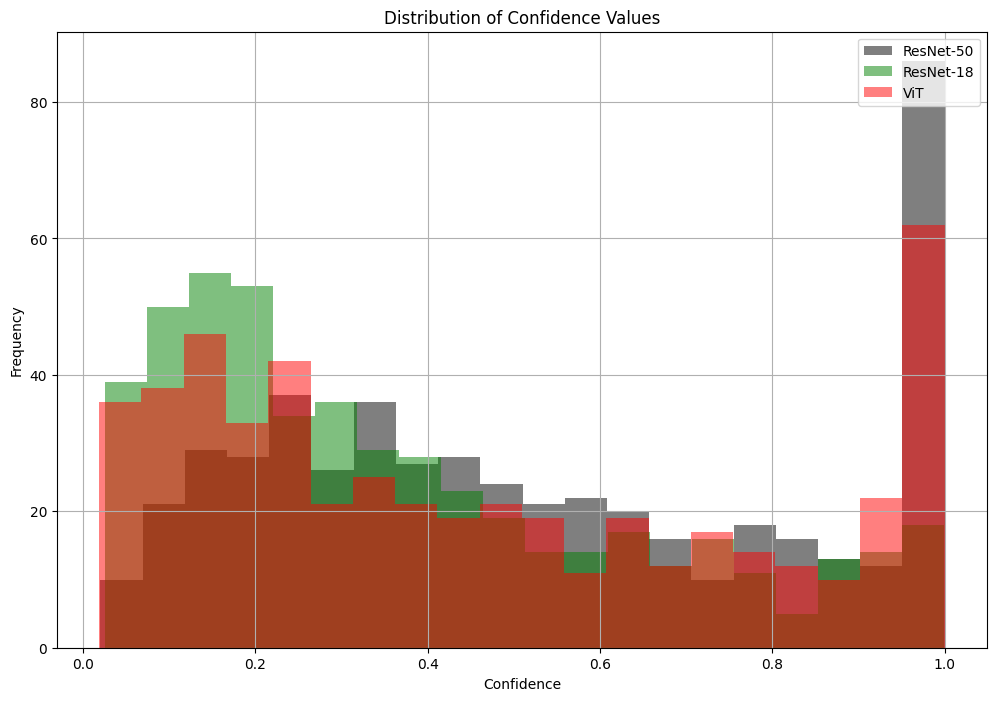

In [5]:
import os
import random
from transformers import AutoImageProcessor, AutoModelForImageClassification, ViTImageProcessor, ViTForImageClassification
from PIL import Image
import torch
import matplotlib.pyplot as plt

# Define the path to the dataset folder
dataset_folder = "C:\\Users\\User\\OneDrive\\Desktop\\ProjectCode\\Team_Project_ComputerVision-1\\Dataset_small"

# Get all image file paths from the folder
image_files = [os.path.join(dataset_folder, file) for file in os.listdir(dataset_folder) if file.lower().endswith(('png', 'jpg', 'jpeg'))]

# Randomly select 500 image files
selected_images = random.sample(image_files, 500)

# Define models and processors
models_processors = [
    {
        'name': 'ResNet-50',
        'processor': AutoImageProcessor.from_pretrained("microsoft/resnet-50"),
        'model': AutoModelForImageClassification.from_pretrained("microsoft/resnet-50")
    },
    {
        'name': 'ResNet-18',
        'processor': AutoImageProcessor.from_pretrained("microsoft/resnet-18"),
        'model': AutoModelForImageClassification.from_pretrained("microsoft/resnet-18")
    },
    {
        'name': 'ViT',
        'processor': ViTImageProcessor.from_pretrained('google/vit-base-patch16-224'),
        'model': ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
    }
]

# Function to get predicted label and confidence
def get_predicted_label_and_confidence(processor, model, image):
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
        softmax = torch.nn.Softmax(dim=-1)
        probs = softmax(logits)
        confidences, predicted_class = torch.max(probs, dim=-1)
    predicted_label = model.config.id2label[predicted_class.item()]
    confidence = confidences.item()
    return predicted_label, confidence

# Collect confidence scores for all images
def collect_confidences_for_all_images(selected_images):
    confidences = {mp['name']: [] for mp in models_processors}
    for image_path in selected_images:
        print(f"\nEvaluating image: {image_path}")
        image = Image.open(image_path)
        for mp in models_processors:
            _, confidence = get_predicted_label_and_confidence(mp['processor'], mp['model'], image)
            confidences[mp['name']].append(confidence)
    return confidences

# Plot the distribution of confidence values
def plot_confidence_distributions(confidences):
    plt.figure(figsize=(12, 8))
    
    colors = {'ResNet-50': 'black', 'ResNet-18': 'green', 'ViT': 'red'}
    
    for model_name, confidences_list in confidences.items():
        plt.hist(confidences_list, bins=20, alpha=0.5, color=colors.get(model_name, 'blue'), label=model_name)

    plt.xlabel('Confidence')
    plt.ylabel('Frequency')
    plt.title('Distribution of Confidence Values')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Run the evaluation and visualization
confidences = collect_confidences_for_all_images(selected_images)
plot_confidence_distributions(confidences)


Jaccard Similarity: Image-to-text Models

In [11]:
import pandas as pd
import re

# Load the Excel file
file_path = 'result_server_dino.xlsx'
df = pd.read_excel(file_path)

# Function to preprocess text into sets of tokens
def preprocess_text(text):
    text = str(text)  # Ensure text is a string
    tokens = re.findall(r'\b\w+\b', text.lower())
    return set(tokens)

# Function to ensure all values are strings
def to_string(value):
    return str(value) if isinstance(value, (str, float, int)) else ''

# Apply the function to ensure all descriptions are strings
df['aisak_description'] = df['aisak_description'].apply(to_string)
df['moondream_description'] = df['moondream_description'].apply(to_string)
df['gemini_description'] = df['gemini_description'].apply(to_string)

# Convert descriptions into sets of tokens
preprocessed_aisak = df['aisak_description'].apply(preprocess_text)
preprocessed_moondream = df['moondream_description'].apply(preprocess_text)
preprocessed_gemini = df['gemini_description'].apply(preprocess_text)

# Function to compute Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union != 0 else 0

# Compute Jaccard similarity for each pair of model descriptions
results = []
for i in range(len(df)):
    set_aisak = preprocessed_aisak.iloc[i]
    set_moondream = preprocessed_moondream.iloc[i]
    set_gemini = preprocessed_gemini.iloc[i]
    
    similarity_aisak_moondream = jaccard_similarity(set_aisak, set_moondream)
    similarity_aisak_gemini = jaccard_similarity(set_aisak, set_gemini)
    similarity_moondream_gemini = jaccard_similarity(set_moondream, set_gemini)
    
    results.append({
        'Image Index': i,
        'Aisak vs Moondream': similarity_aisak_moondream,
        'Aisak vs Gemini': similarity_aisak_gemini,
        'Moondream vs Gemini': similarity_moondream_gemini
    })
    
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save results to a new Excel file
results_file_path = 'text_comparison_results.xlsx'
results_df.to_excel(results_file_path, index=False)

# Or, print results
print(results_df)


      Image Index  Aisak vs Moondream  Aisak vs Gemini  Moondream vs Gemini
0               0            0.106383         0.102041             0.178082
1               1            0.080000         0.113636             0.347826
2               2            0.235294         0.212121             0.234043
3               3            0.064516         0.159091             0.222222
4               4            0.095238         0.060000             0.232558
...           ...                 ...              ...                  ...
4995         4995            0.166667         0.000000             0.000000
4996         4996            0.209302         0.000000             0.000000
4997         4997            0.100000         0.162162             0.258065
4998         4998            0.166667         0.000000             0.000000
4999         4999            0.200000         0.000000             0.000000

[5000 rows x 4 columns]


Average Jaccard Similarity: 
This will show the average Jaccard similarity between each pair of descriptions across all images. This gives a general sense of how similar the vocabularies are across the different models.

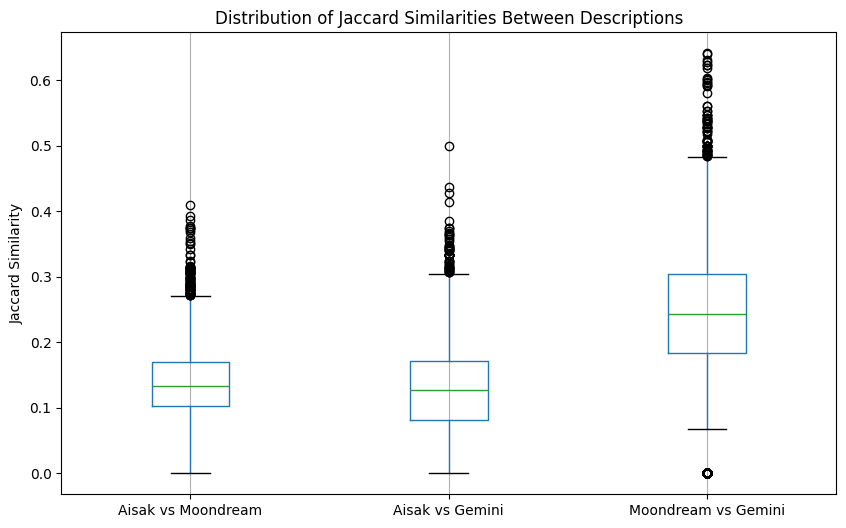

In [14]:
#visualiztion of jaccard similarity for 3 text descriptions
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file containing the results
results_file_path = 'text_comparison_results.xlsx'
results_df = pd.read_excel(results_file_path)


# Plot box plots to show the distribution of Jaccard similarities
plt.figure(figsize=(10, 6))
results_df.boxplot(column=['Aisak vs Moondream', 'Aisak vs Gemini', 'Moondream vs Gemini'])
plt.title('Distribution of Jaccard Similarities Between Descriptions')
plt.ylabel('Jaccard Similarity')
plt.grid(axis='y')
plt.show()


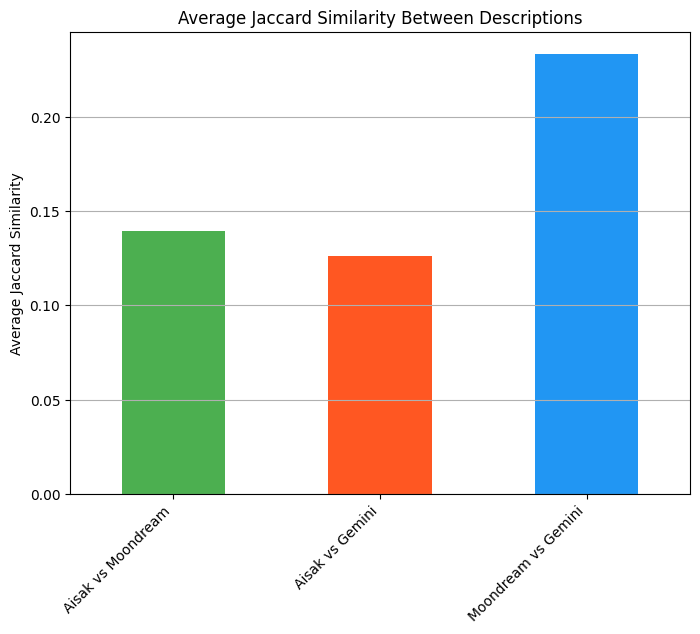

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# If 'Image Index' column exists, drop it
if 'Image Index' in results_df.columns:
    results_df = results_df.drop(columns=['Image Index'])

# Calculate the average Jaccard similarity for each pair of descriptions
average_similarity = results_df.mean()

# Plot a bar chart of average Jaccard similarities
plt.figure(figsize=(8, 6))
average_similarity.plot(kind='bar', color=['#4CAF50', '#FF5722', '#2196F3'])
plt.title('Average Jaccard Similarity Between Descriptions')
plt.ylabel('Average Jaccard Similarity')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()
